In [12]:
import pandas as pd
import chembl_webresource_client.new_client as nc
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem
import requests
from bs4 import BeautifulSoup
from chembletouni import chemble_to_uni
from findpdb import get_pdb_with_best_resolution, get_all_pdb_entries
from webscraping import webScrape
from openbabel import run_openbabel
from prody import *
from pylab import *
import nglview as vw


In [2]:
tr = nc.new_client.target


In [3]:
query = tr.search('jak').only('target_chembl_id', 'organism', 'pref_name')
query_pd = pd.DataFrame.from_dict(query)
query_pd = query_pd[query_pd['target_chembl_id'].apply(lambda x: len(str(x)) == 10)]
query_pd



,organism,pref_name,target_chembl_id
2,Homo sapiens,Tyrosine-protein kinase JAK3,CHEMBL2148
7,Homo sapiens,Tyrosine-protein kinase JAK1,CHEMBL2835
8,Mus musculus,Tyrosine-protein kinase JAK1,CHEMBL2968
9,Homo sapiens,Tyrosine-protein kinase JAK2,CHEMBL2971
10,Mus musculus,Tyrosine-protein kinase JAK3,CHEMBL5250
21,Homo sapiens,Tyrosine-protein kinase TYK2,CHEMBL3553


In [4]:
target = query_pd.iloc[1]

In [5]:
target

organism                            Homo sapiens
pref_name           Tyrosine-protein kinase JAK1
target_chembl_id                      CHEMBL2835
Name: 7, dtype: object

In [6]:
mych = str(target['target_chembl_id'])

In [7]:
uni = chemble_to_uni(mych)

In [8]:
best_pdb_id, best_length, best_resolution, chains = get_pdb_with_best_resolution(uni)

print(best_pdb_id,"| res : ", best_resolution, chains)

5L04 | res :  2.1 D=1027-1042.


In [16]:
pdbs = get_all_pdb_entries(uni)
df = pd.DataFrame(pdbs)
sorted_df = df.sort_values(by=['length', 'num_chains', 'resolution'], ascending=[False, False, True])
sorted_df['resolution'] = sorted_df['resolution'].astype(str)
sorted_df['length'] = sorted_df['length'].astype(str)
sorted_df['num_chains'] = sorted_df['num_chains'].astype(str)
print(sorted_df.head(),sorted_df.dtypes)

   pdb_id method resolution length num_chains
23   5L04  X-ray        2.1    547          1
20   5IXI  X-ray       2.57    525          1
19   5IXD  X-ray       2.85    525          1
26   6BBU  X-ray       2.08    314          1
48   6W8L  X-ray       2.11    314          1 pdb_id        object
method        object
resolution    object
length        object
num_chains    object
dtype: object


In [17]:
atoms, header = parsePDB(best_pdb_id, header=True)
list(header)

@> Connecting wwPDB FTP server RCSB PDB (USA).


KeyboardInterrupt: 

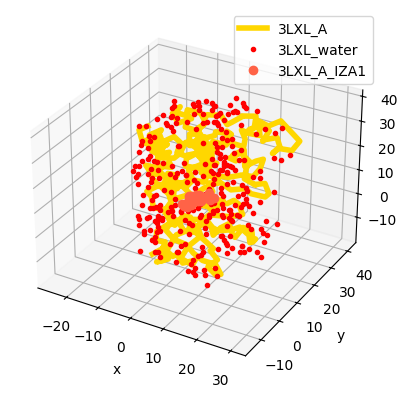

In [13]:
showProtein(atoms)
legend()

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

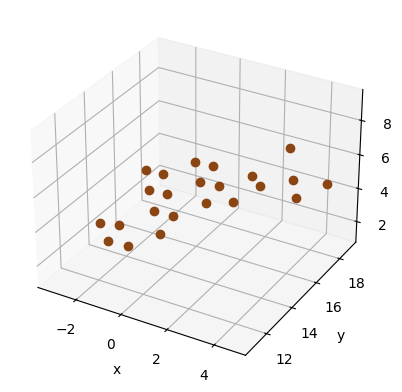

In [14]:
hetero = atoms.select('not water and not protein')
showProtein(hetero)

In [15]:
ligands = hetero.getHierView().iterResidues()
list_ligs = []
list_of_ligs = []
for i, residue in enumerate(ligands, start=1):
    list_of_ligs.append(i)
    list_ligs.append(str(residue))
    writePDB(f'{str(best_pdb_id)}_ligand_{i}', residue)

In [16]:
list_of_ligs
list_ligs

['IZA 1']

In [17]:
for i in list_of_ligs:
    run_openbabel(input_file=f'{str(best_pdb_id)}_ligand_{i}.pdb', input_format='pdb', output_file=f'{str(best_pdb_id)}_ligand_{i}.smi', output_format='smi')
    

In [18]:
smiles_l = []
for i in list_of_ligs:    
    with open(f'{str(best_pdb_id)}_ligand_{i}.smi', 'r') as file:
        content = file.read()
        smiles, filename = content.split()
        smiles_l.append(smiles)



In [19]:
smiles_l

['O=C1N=CCc2c3c(c4c(c12)cc(F)cc4)nc([nH]3)C(C)(C)C']

In [20]:
smile_dict = dict(zip(list_ligs, smiles_l))
smile_dict

{'IZA 1': 'O=C1N=CCc2c3c(c4c(c12)cc(F)cc4)nc([nH]3)C(C)(C)C'}

In [19]:
smile_dict.values()

dict_values(['O=C1N=CCc2c3c(c4c(c12)cc(F)cc4)nc([nH]3)C(C)(C)C'])

In [13]:
data = webScrape("CN1C(=O)[C@H](CC2=CNC3=C2C=CC=C3Cl)NC1=O")

the radio button is :  CHEMBL_drug___7 the index is : 0 the method is :  2D - FP2
the radio button is :  CHEMBL_drug___8 the index is : 1 the method is :  2D - ECFP4
the radio button is :  CHEMBL_drug___9 the index is : 2 the method is :  2D - MHFP6
the radio button is :  CHEMBL_clinic___0 the index is : 3 the method is :  2D - Pharmacophore
the radio button is :  CHEMBL_clinic___1 the index is : 4 the method is :  2D - ErG
the radio button is :  CHEMBL_clinic___2 the index is : 5 the method is :  2D - Scaffold
the radio button is :  CHEMBL_clinic___3 the index is : 6 the method is :  2D - Generic Scaffold
No results for radio button index 6. Moving on...
the radio button is :  CHEMBL_clinic___4 the index is : 7 the method is :  3D - Electroshape
the radio button is :  CHEMBL_clinic___5 the index is : 8 the method is :  3D - E3FP
No results for radio button index 8. Moving on...
the radio button is :  CHEMBL_clinic___6 the index is : 9 the method is :  2D & 3D combined
No results for r

In [7]:
print(("CHEMBL_clinic___9")[:-4])

CHEMBL_clinic


In [15]:
data

[{'method': '2D - FP2',
  'SMILES_data': 'CCC1(NC(=O)N(C)C1=O)C1=CC=CC=C1',
  'Molecule_ID': 'CHEMBL861',
  'Score': '0.885'},
 {'method': '2D - FP2',
  'SMILES_data': 'CCC1(NC(=O)N(C)C1=O)C1=CC=CC=C1',
  'Molecule_ID': 'CHEMBL3137320',
  'Score': '0.881'},
 {'method': '2D - FP2',
  'SMILES_data': 'CCC1(NC(=O)N(C)C1=O)C1=CC=CC=C1',
  'Molecule_ID': 'CHEMBL45',
  'Score': '0.880'},
 {'method': '2D - FP2',
  'SMILES_data': 'CCC1(NC(=O)N(C)C1=O)C1=CC=CC=C1',
  'Molecule_ID': 'CHEMBL1079604',
  'Score': '0.870'},
 {'method': '2D - FP2',
  'SMILES_data': 'O=C1NC(=O)C(N1)(C1=CC=CC=C1)C1=CC=CC=C1',
  'Molecule_ID': 'CHEMBL1611',
  'Score': '0.870'},
 {'method': '2D - FP2',
  'SMILES_data': 'O=C1NC(=O)C(N1)(C1=CC=CC=C1)C1=CC=CC=C1',
  'Molecule_ID': 'CHEMBL16',
  'Score': '0.870'},
 {'method': '2D - FP2',
  'SMILES_data': 'O=C1NC(=O)C(N1)(C1=CC=CC=C1)C1=CC=CC=C1',
  'Molecule_ID': 'CHEMBL3137318',
  'Score': '0.869'},
 {'method': '2D - FP2',
  'SMILES_data': 'O=C1NC(=O)C(N1)(C1=CC=CC=C1)C1=CC=

In [14]:
df_drugs = pd.DataFrame(data)
df_sorted = df_drugs.sort_values(by='Score', ascending=False)

df_sorted

,method,SMILES_data,Molecule_ID,Score
505,2D - MHFP6,FC1=CC=C2NC=C(C3CC(=O)NC3=O)C2=C1,CHEMBL4086143,0.965
506,2D - MHFP6,FC1=CC=C2NC=C(C3CC(=O)NC3=O)C2=C1,CHEMBL2103882,0.951
53,2D - MHFP6,CCC1(NC(=O)N(C)C1=O)C1=CC=CC=C1,CHEMBL861,0.920
507,2D - MHFP6,FC1=CC=C2NC=C(C3CC(=O)NC3=O)C2=C1,CHEMBL49642,0.908
54,2D - MHFP6,CCC1(NC(=O)N(C)C1=O)C1=CC=CC=C1,CHEMBL45,0.902
...,...,...,...,...
418,2D - MHFP6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,CHEMBL566534,0.043
419,2D - MHFP6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,CHEMBL504760,0.042
421,2D - MHFP6,C[N+](C)(C)CCOC(N)=O,CHEMBL14,0.040
420,2D - MHFP6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,CHEMBL965,0.040


In [6]:
df_sorted['method'][0]

<selenium.webdriver.remote.webelement.WebElement (session="550b2d1bd0754972225624e6677bd944", element="f.340DA6C77F77B347EE5214A8F5B82F38.d.25A902421F9E88B46BBC184DCDF71FB9.e.36")>

In [22]:
df_drugsFriltered = df_sorted[df_sorted['Score'].astype(float) >= 0.5]

In [23]:
df_drugsFriltered

,SMILES_ID,SMILES_data,Molecule_ID,Score
605,CHEMBL16293,C1=CC2=CC=CC=C2C=C1,CHEMBL16293,0.997
606,CHEMBL16293,C1=CC2=CC=CC=C2C=C1,CHEMBL9113,0.973
42,DB11558,CC1=CC=CC=C1,DB11558,0.973
498,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL16293,0.857
497,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL46730,0.857
1,DB11558,CC1=CC=CC=C1,DB06728,0.500
499,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL9113,0.500
43,CHEMBL14060,OC1=CC=CC=C1,CHEMBL14060,0.500
0,DB11558,CC1=CC=CC=C1,DB11558,0.500
2,DB11558,CC1=CC=CC=C1,DB03255,0.500


In [4]:
mol = Chem.MolFromSmiles('C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)COP(O)(O)=O')
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

# Export to PDB
pdb_output = Chem.MolToPDBBlock(mol)
with open("molecule.pdb", "w") as file:
    file.write(pdb_output)